In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('bank-additional/bank-additional-full.csv')
data.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [38]:
label = ['age','job',"marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]
for i in data:
    value = data[i][:].str.split(';')

for i in range(len(value)):
    for j in range(len(value[i])):
        if '"' in value[i][j]:
            value[i][j] = value[i][j][1:-1]

0        [56, housemaid, married, basic.4y, no, no, no,...
1        [57, services, married, high.school, unknown, ...
2        [37, services, married, high.school, no, yes, ...
3        [40, admin., married, basic.6y, no, no, no, te...
4        [56, services, married, high.school, no, no, y...
5        [45, services, married, basic.9y, unknown, no,...
6        [59, admin., married, professional.course, no,...
7        [41, blue-collar, married, unknown, unknown, n...
8        [24, technician, single, professional.course, ...
9        [25, services, single, high.school, no, yes, n...
10       [41, blue-collar, married, unknown, unknown, n...
11       [25, services, single, high.school, no, yes, n...
12       [29, blue-collar, single, high.school, no, no,...
13       [57, housemaid, divorced, basic.4y, no, yes, n...
14       [35, blue-collar, married, basic.6y, no, yes, ...
15       [54, retired, married, basic.9y, unknown, yes,...
16       [35, blue-collar, married, basic.6y, no, yes, .

In [39]:
temp = []
for index in range(len(value)):
    index = pd.DataFrame({label[i]: [value[index][i]] for i in range(len(label))})
    temp.append(index)

result = pd.concat(temp, ignore_index=True)

In [40]:
result.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [41]:
result.to_csv('original_data.csv')

In [43]:
missing_list = []
for i in range(len(result.index)):
    if 'unknown' in result.iloc[i].values:
        missing_list.append(i)

In [103]:
purify_data = result.drop(missing_list)
purify_data.to_csv('handle_data.csv')
purify_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [3]:
from sklearn.model_selection import cross_val_score, train_test_split

data = pd.read_csv('handle_data.csv')
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,Unnamed: 0,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,21934.161539,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,11833.377422,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,12005.750000,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,22807.500000,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,32198.250000,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data['job'].value_counts()


admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split

LabelEncoder = LabelEncoder()
for label in data.columns:
    data[label]= LabelEncoder.fit_transform(data[label])


data.describe()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,30488.00000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,...,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,15243.50000,22.029749,3.716708,1.193191,3.842791,0.000098,0.541885,0.156389,0.329474,4.249442,...,1.520959,24.182400,0.194273,0.925544,6.336296,13.705261,10.227204,248.203523,7.656521,0.126574
std,8801.27184,10.332175,3.612755,0.623663,1.988911,0.009919,0.498251,0.363230,0.470030,2.383742,...,2.713405,3.936855,0.522788,0.383466,2.872345,5.641292,6.119740,71.360013,2.564592,0.332501
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7621.75000,14.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,25.000000,0.000000,1.000000,3.000000,10.000000,6.000000,210.000000,6.000000,0.000000
50%,15243.50000,20.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,...,1.000000,25.000000,0.000000,1.000000,8.000000,13.000000,8.000000,284.000000,8.000000,0.000000
75%,22865.25000,28.000000,7.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,6.000000,...,2.000000,25.000000,0.000000,1.000000,9.000000,18.000000,16.000000,303.000000,10.000000,0.000000
max,30487.00000,75.000000,10.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,9.000000,...,40.000000,25.000000,7.000000,2.000000,9.000000,25.000000,25.000000,313.000000,10.000000,1.000000


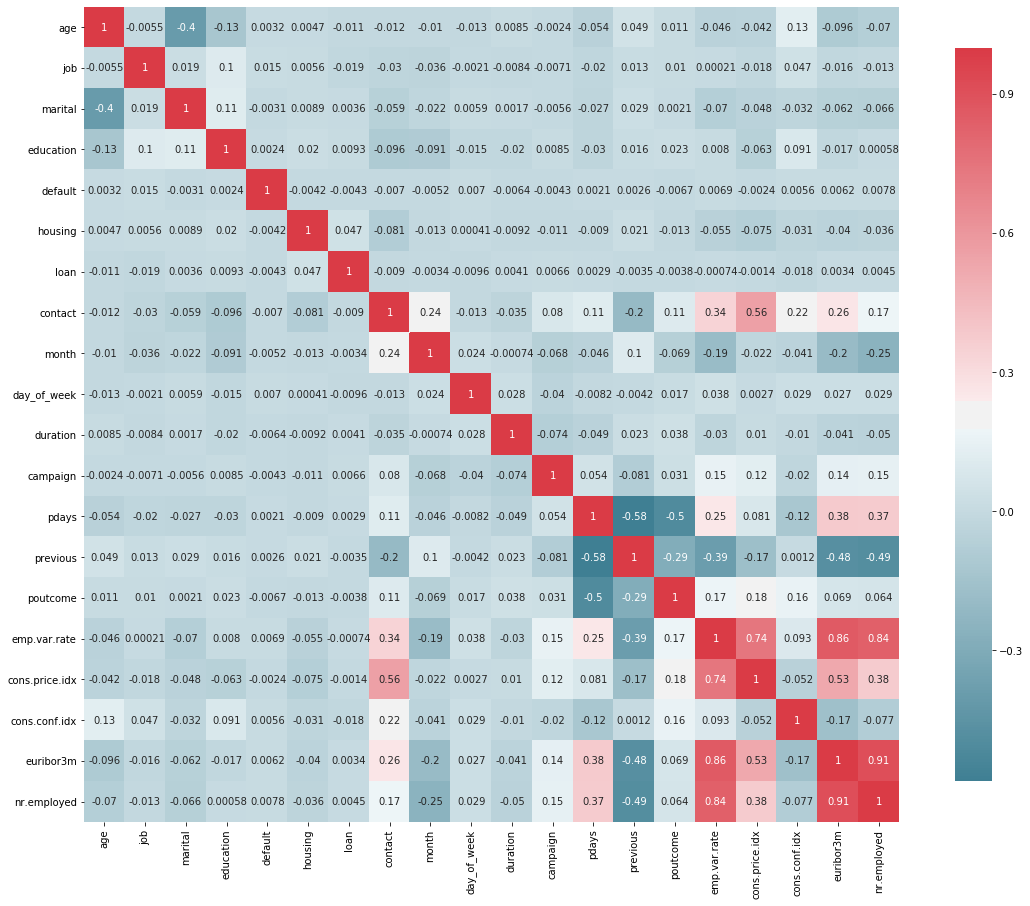

In [7]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 20 , 15 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 10 }
    )
    
plot_correlation_map(data.iloc[:,1:-1])

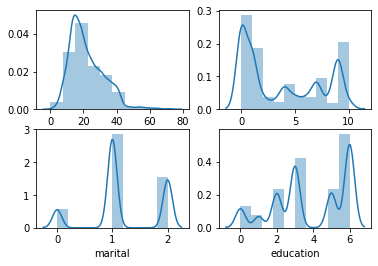

In [8]:
fig, ax = plt.subplots()


ax1 = plt.subplot(2, 2, 1)
sns.distplot(data['age'], bins=10, kde=True)

ax2 = plt.subplot(2, 2, 2)
sns.distplot(data['job'], bins=10, kde=True)

ax3 = plt.subplot(2, 2, 3)
sns.distplot(data['marital'], bins=10, kde=True)

ax4 = plt.subplot(2, 2, 4)
sns.distplot(data['education'], bins=10, kde=True)

In [9]:
data1 = data.drop(['euribor3m','nr.employed'], axis = 1)

In [10]:
from sklearn.model_selection import train_test_split 

X = data1.iloc[:,1:-1].values
Y = data1.iloc[:,-1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [158]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=15)
train_data_pca = pca.fit_transform(X_train)
test_data_pca = pca.fit_transform(X_test)


Iteration 1, loss = 0.30414902
Iteration 2, loss = 0.23683012
Iteration 3, loss = 0.22528019
Iteration 4, loss = 0.22139772
Iteration 5, loss = 0.21988731
Iteration 6, loss = 0.21756879
Iteration 7, loss = 0.21643636
Iteration 8, loss = 0.21615724
Iteration 9, loss = 0.21565725
Iteration 10, loss = 0.21537858
Iteration 11, loss = 0.21499162
Iteration 12, loss = 0.21409775
Iteration 13, loss = 0.21369795
Iteration 14, loss = 0.21312618
Iteration 15, loss = 0.21345204
Iteration 16, loss = 0.21214494
Iteration 17, loss = 0.21198762
Iteration 18, loss = 0.21083031
Iteration 19, loss = 0.21083753
Iteration 20, loss = 0.20977312
Iteration 21, loss = 0.20927631
Iteration 22, loss = 0.20896666
Iteration 23, loss = 0.20895745
Iteration 24, loss = 0.20759461
Iteration 25, loss = 0.20812182
Iteration 26, loss = 0.20843643
Iteration 27, loss = 0.20736762
Iteration 28, loss = 0.20698615
Iteration 29, loss = 0.20634653
Iteration 30, loss = 0.20534230
Iteration 31, loss = 0.20586600
Iteration 32, los

Iteration 253, loss = 0.16456260
Iteration 254, loss = 0.16453434
Iteration 255, loss = 0.16424141
Iteration 256, loss = 0.16380535
Iteration 257, loss = 0.16352955
Iteration 258, loss = 0.16377182
Iteration 259, loss = 0.16320133
Iteration 260, loss = 0.16397929
Iteration 261, loss = 0.16389213
Iteration 262, loss = 0.16338894
Iteration 263, loss = 0.16385717
Iteration 264, loss = 0.16286114
Iteration 265, loss = 0.16224327
Iteration 266, loss = 0.16343977
Iteration 267, loss = 0.16276299
Iteration 268, loss = 0.16223422
Iteration 269, loss = 0.16332068
Iteration 270, loss = 0.16293371
Iteration 271, loss = 0.16174620
Iteration 272, loss = 0.16217219
Iteration 273, loss = 0.16235276
Iteration 274, loss = 0.16176273
Iteration 275, loss = 0.16204182
Iteration 276, loss = 0.16231518
Iteration 277, loss = 0.16137572
Iteration 278, loss = 0.16104301
Iteration 279, loss = 0.16109307
Iteration 280, loss = 0.16141124
Iteration 281, loss = 0.16170862
Iteration 282, loss = 0.16017228
Iteration 

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [11]:
from sklearn.neural_network import MLPClassifier

MLPNN = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = True)
MLPNN.fit(X_train, Y_train)

Y_pred = MLPNN.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of MLPNN:', accuracy_score(Y_test, Y_pred))

Iteration 1, loss = 0.31947769
Iteration 2, loss = 0.25310685
Iteration 3, loss = 0.23897940
Iteration 4, loss = 0.23158654
Iteration 5, loss = 0.22460338
Iteration 6, loss = 0.22043935
Iteration 7, loss = 0.21782483
Iteration 8, loss = 0.21651655
Iteration 9, loss = 0.21440665
Iteration 10, loss = 0.21269741
Iteration 11, loss = 0.21323224
Iteration 12, loss = 0.21252666
Iteration 13, loss = 0.21099742
Iteration 14, loss = 0.21105782
Iteration 15, loss = 0.21081994
Iteration 16, loss = 0.20935066
Iteration 17, loss = 0.20978042
Iteration 18, loss = 0.20893529
Iteration 19, loss = 0.20841334
Iteration 20, loss = 0.21005649
Iteration 21, loss = 0.20853548
Iteration 22, loss = 0.20757180
Iteration 23, loss = 0.20925311
Iteration 24, loss = 0.20756541
Iteration 25, loss = 0.20822488
Iteration 26, loss = 0.20784892
Iteration 27, loss = 0.20731300
Iteration 28, loss = 0.20712892
Iteration 29, loss = 0.20555283
Iteration 30, loss = 0.20610011
Iteration 31, loss = 0.20540335
Iteration 32, los

Iteration 253, loss = 0.17976978
Iteration 254, loss = 0.18075356
Iteration 255, loss = 0.18097619
Iteration 256, loss = 0.17951437
Iteration 257, loss = 0.18001716
Iteration 258, loss = 0.17993000
Iteration 259, loss = 0.18009766
Iteration 260, loss = 0.17935365
Iteration 261, loss = 0.17972445
Iteration 262, loss = 0.17952396
Iteration 263, loss = 0.18029667
Iteration 264, loss = 0.17974721
Iteration 265, loss = 0.17893817
Iteration 266, loss = 0.17889475
Iteration 267, loss = 0.17924518
Iteration 268, loss = 0.17866868
Iteration 269, loss = 0.17869060
Iteration 270, loss = 0.17912642
Iteration 271, loss = 0.17882094
Iteration 272, loss = 0.17912680
Iteration 273, loss = 0.17897089
Iteration 274, loss = 0.17846939
Iteration 275, loss = 0.17816965
Iteration 276, loss = 0.17933826
Iteration 277, loss = 0.17850222
Iteration 278, loss = 0.17934408
Iteration 279, loss = 0.17808587
Iteration 280, loss = 0.17855176
Iteration 281, loss = 0.17862755
Iteration 282, loss = 0.17901971
Iteration 

In [15]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred = NB.predict(X_test)
    
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5328
           1       0.40      0.52      0.46       770

    accuracy                           0.84      6098
   macro avg       0.67      0.71      0.68      6098
weighted avg       0.86      0.84      0.85      6098

[[4737  591]
 [ 368  402]]
accuracy of NB: 0.8427353230567399


In [16]:
from sklearn.svm import SVC 

SVM = SVC()
SVM.fit(X_train, Y_train)

Y_pred = SVM.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of SVM:', accuracy_score(Y_test, Y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5328
           1       0.71      0.01      0.01       770

    accuracy                           0.87      6098
   macro avg       0.79      0.50      0.47      6098
weighted avg       0.85      0.87      0.82      6098

[[5326    2]
 [ 765    5]]
accuracy of SVM: 0.874221056083962


In [18]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)

Y_pred = KNN.predict(X_test)
    
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of KNN:', accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5328
           1       0.57      0.36      0.44       770

    accuracy                           0.88      6098
   macro avg       0.74      0.66      0.69      6098
weighted avg       0.87      0.88      0.87      6098

[[5112  216]
 [ 489  281]]
accuracy of KNN: 0.884388324040669


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5328
           1       0.49      0.50      0.50       770

    accuracy                           0.87      6098
   macro avg       0.71      0.71      0.71      6098
weighted avg       0.87      0.87      0.87      6098

[[4934  394]
 [ 386  384]]
accuracy of DT: 0.8720892095769105


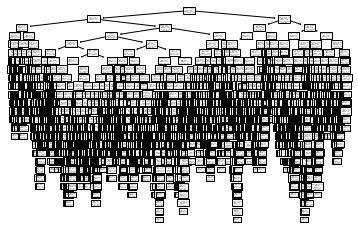

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

Y_pred = DT.predict(X_test)
    
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('accuracy of DT:', accuracy_score(Y_test, Y_pred))

In [30]:
MLPNN_score = MLPNN.predict_proba(X_test)
NB_score = NB.predict_proba(X_test)
SVM_score = SVM.decision_function(X_test)
KNN_score = KNN.predict_proba(X_test)
DT_score = DT.predict_proba(X_test)

[[9.99999128e-01 8.72454159e-07]
 [9.99870456e-01 1.29544090e-04]
 [9.43508037e-01 5.64919632e-02]
 ...
 [9.99999551e-01 4.48958624e-07]
 [9.99999416e-01 5.84377317e-07]
 [9.99992355e-01 7.64543945e-06]] [[9.87474271e-01 1.25257289e-02]
 [9.99547995e-01 4.52004625e-04]
 [9.79496711e-01 2.05032890e-02]
 ...
 [9.99728181e-01 2.71819496e-04]
 [9.99480454e-01 5.19545671e-04]
 [9.98373722e-01 1.62627786e-03]] [-0.99924994 -0.88000136 -0.96120126 ... -0.79574856 -0.76834429
 -1.00971949] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


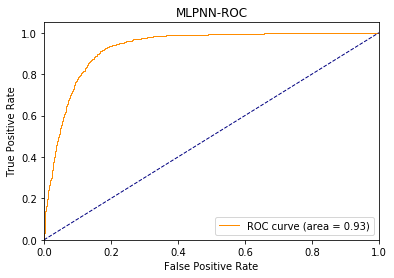

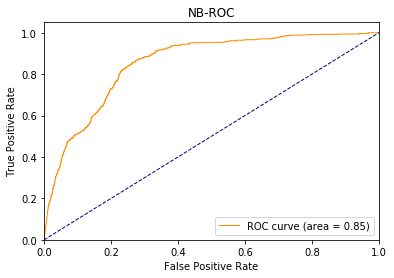

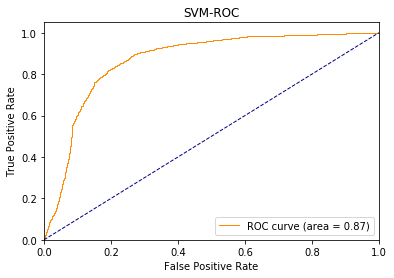

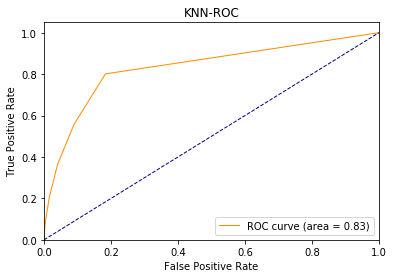

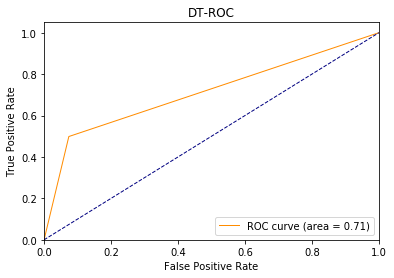

In [83]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test, MLPNN_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLPNN-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test, NB_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test, SVM_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test, KNN_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test, DT_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT-ROC')
plt.legend(loc="lower right")
plt.show()